# Imports

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from pandas.plotting import lag_plot
import statsmodels.api as sm 
from statsmodels.graphics.tsaplots import plot_acf


<h1> Plotting </h1>

In [2]:
def plot_seasonal_decomposition(data, param,decomposition_model="additive",freq=30):
    from pylab import rcParams
    rcParams['figure.figsize'] = 18, 8
    decomposition = sm.tsa.seasonal_decompose(data[param], model=decomposition_model,freq=freq)
    decomposition.plot()
    return decomposition

def seasonal_plot(time_series,ax, season="W"):

    if season not in ["W", "M"]:
        raise ValueError
    else:
        if season == "W":
            win_size = 7
            win_map = lambda x: x.weekday()
            title = "Weakly"

        elif season == "M":
            win_size = 30
            win_map = lambda x: x.day
            title = "Monthly"



        by_day = time_series.resample(rule="D", how="sum")

        for i in range(by_day.shape[0] // win_size + 1):
            window_values = by_day.values[i * win_size:(i + 1) * win_size]
            days = by_day.index[i * win_size:(i + 1) * win_size].map(win_map)
            if window_values.ndim == 2:
                window_values = window_values[:, 0]
            values_dict = dict(zip(window_values, days))
            values_dict = {k: v for k, v in sorted(values_dict.items(), key=lambda item: item[1])}
            days, values = list(values_dict.values()), list(values_dict.keys())
            ax.plot(days, values, marker='.', linestyle='-', linewidth=0.95)
        ax.set_title("{} plot".format(title))
        if season == "M":
            ax.legend(np.unique(time_series.index.month))


def yearly_plot(data,param,title,ax):
    all_years = [data.index[i].year for i in range(data.shape[0])]
    
    for year in all_years:
        temps = data[data.index.year == year][param]
        ax.plot(list(range(len(temps))),temps, linestyle='-', linewidth=0.8)
        
    ax.set_xlabel("Days")
    ax.set_ylabel(param)
    ax.set_title(title)


def plot_series(data,title,param,ax):
    data[param].plot(linestyle='-', linewidth=0.8,ax=ax)
    ax.set_title(title)
    ax.set_xlabel("Time")
    ax.set_ylabel(param)
    
def lags_plot(param,lags):
    n_rows,n_cols = 2, len(lags)//2
    fig,ax = plt.subplots(n_rows,n_cols,figsize=(20,16))
    i = 0
    for row in ax:
        for col in row:         
            lag_plot(param,lag=lags[i],ax=col)
            i+=1
    plt.show()

## Load data

In [3]:
data_path = "../../Data/Forecasting_data.csv"
data = pd.read_csv(data_path)
data.head()
data.drop(columns=["Unnamed: 0"],inplace=True)
data["Time"] = pd.to_datetime(data["Time"])

In [4]:
data.tail()

,Dish1,Dish2,Time,Delivery
56978,0.0,0.0,2018-06-30 21:25:04,0
56979,0.0,0.0,2018-06-30 21:34:57,0
56980,0.0,0.0,2018-06-30 21:45:19,1
56981,0.0,0.0,2018-06-30 21:52:12,0
56982,0.0,0.0,2018-06-30 22:20:19,1


In [5]:
dish1_delivery = data[data['Delivery']==1][['Dish1','Time']]
dish1_delivery.set_index(dish1_delivery["Time"],inplace = True)
dish1_delivery = dish1_delivery[['Dish1']]

In [6]:
dish1_delivery = dish1_delivery.resample(rule="D").sum()

In [7]:
dish1_delivery.sum()

Dish1    0.0
dtype: float64

## As we see there is no delivery with Dish 1

In [8]:
dish1 = data[data['Delivery']==0][['Dish1','Time']]
dish1.set_index(dish1["Time"],inplace = True)
dish1 = dish1[['Dish1']]

In [9]:
dish2_delivery = data[data['Delivery']==1][['Dish2','Time']]
dish2_delivery.set_index(dish2_delivery["Time"],inplace = True)
dish2_delivery = dish2_delivery[['Dish2']]

In [10]:
dish2_delivery = dish2_delivery.resample(rule="D").sum()

In [11]:
dish2_delivery.sum()

Dish2    0.218
dtype: float64

# There is only one day of dish2 order with delivery with number 0.218.Lets also omit this one.

In [12]:
dish2 = data[data['Delivery']==0][['Dish2','Time']]
dish2.set_index(dish2["Time"],inplace = True)
dish2 = dish2[['Dish2']]

In [13]:
dish1_daily = dish1.resample(rule="D").sum()
dish1_weekly = dish1.resample(rule="W").sum()
dish1_monthly = dish1.resample(rule="M").sum()
dish2_daily = dish2.resample(rule="D").sum()
dish2_weekly = dish2.resample(rule="W").sum()
dish2_monthly = dish2.resample(rule="M").sum()

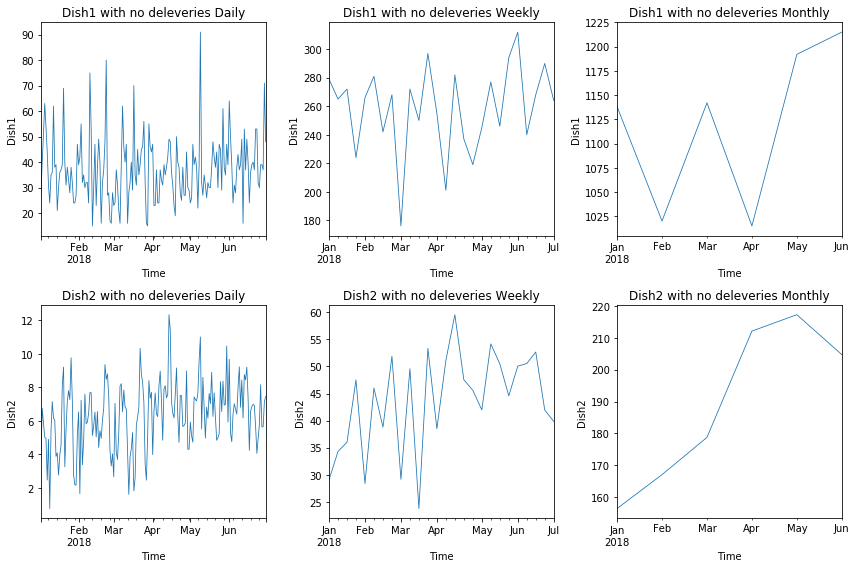

In [14]:
fig, axes = plt.subplots(nrows=2, ncols=3,figsize=(12, 8))
plot_series(dish1_daily,"Dish1 with no deleveries Daily","Dish1",ax=axes[0][0])
plot_series(dish1_weekly,"Dish1 with no deleveries Weekly","Dish1",ax=axes[0][1])
plot_series(dish1_monthly,"Dish1 with no deleveries Monthly","Dish1",ax=axes[0][2])
plot_series(dish2_daily,"Dish2 with no deleveries Daily","Dish2",ax=axes[1][0])
plot_series(dish2_weekly,"Dish2 with no deleveries Weekly","Dish2",ax=axes[1][1])
plot_series(dish2_monthly,"Dish2 with no deleveries Monthly","Dish2",ax=axes[1][2])
fig.tight_layout()

# dish1 and dish2 show very high results in may, with no deleveries. As I understood this data is from russian restaurant and it can be related with May holidays in Russia.

/home/levon/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:25: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).sum()


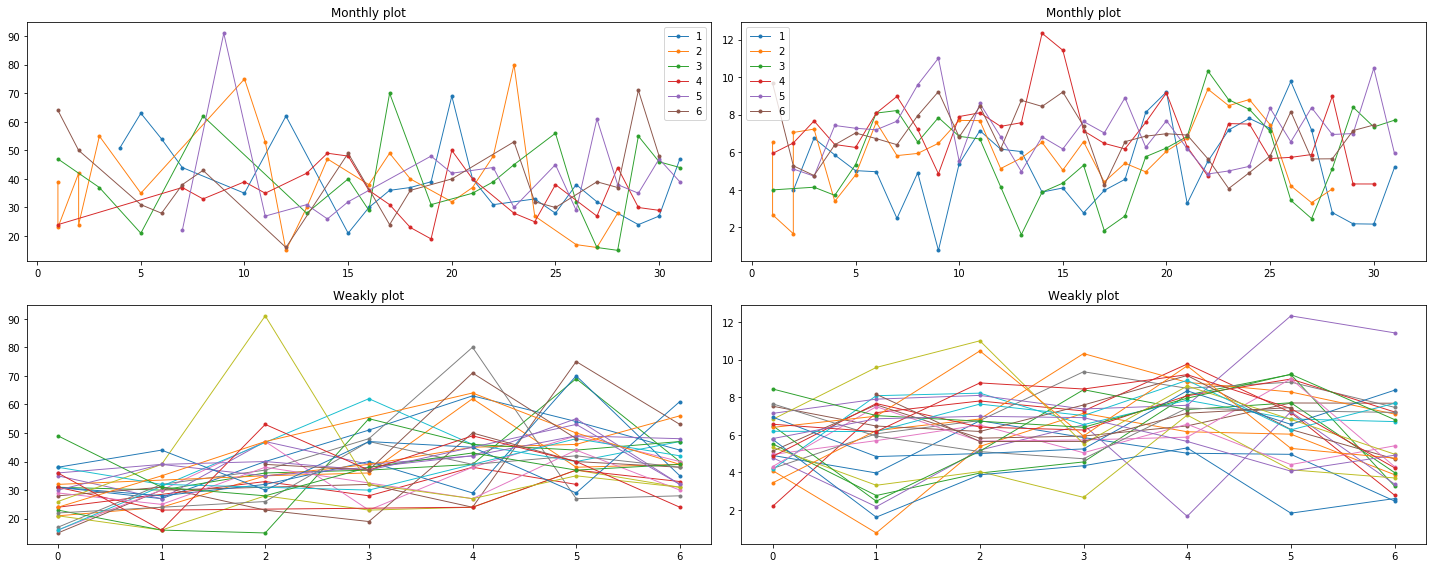

In [15]:
fig, axes = plt.subplots(nrows=2, ncols=2,figsize=(20, 8))
seasonal_plot(dish1_daily,ax=axes[0][0],season="M")
seasonal_plot(dish2_daily,ax=axes[0][1],season="M")
seasonal_plot(dish1_daily,ax=axes[1][0],season="W")
seasonal_plot(dish2_daily,ax=axes[1][1],season="W")
fig.tight_layout()

#  For dish1 we see that overall the pick is for friday and saturday, while for dish2 ommiting some outliers the series is stable. For monthly period we can say that for dish2 in 4th (April) there was pick in the middle of month. For dish1 I cant see any pattern.

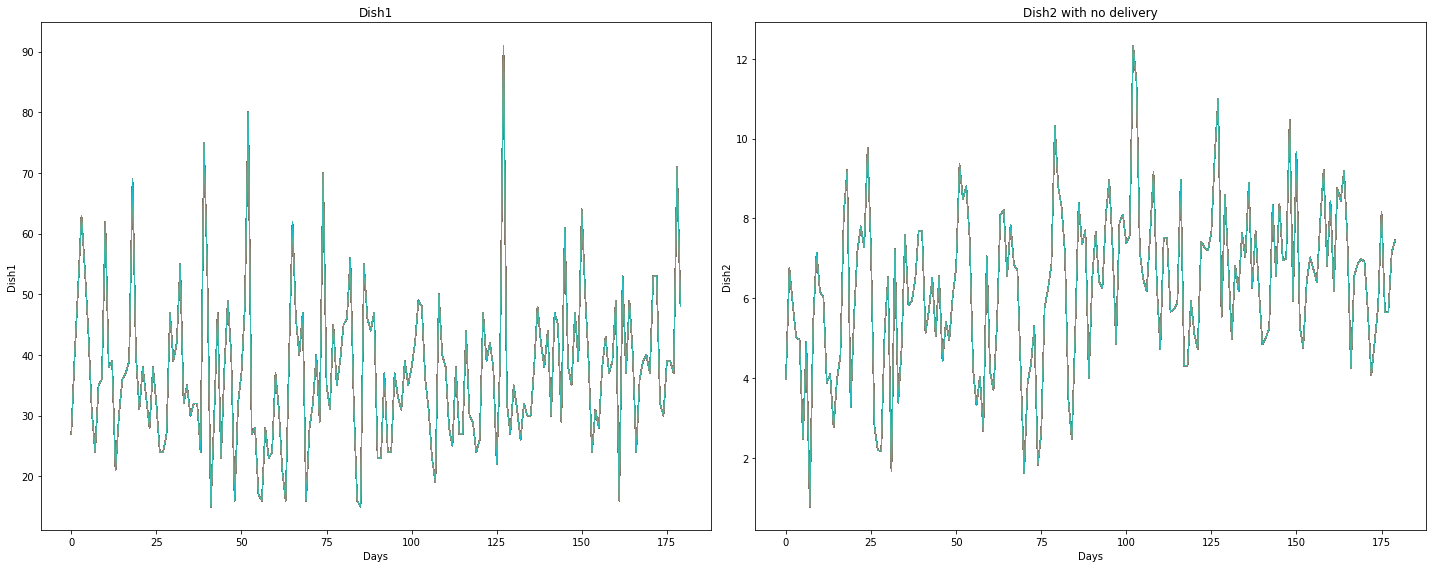

In [16]:
fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(20, 8))
yearly_plot(dish1_daily,"Dish1","Dish1",ax=axes[0])
yearly_plot(dish2_daily,"Dish2","Dish2 with no delivery",ax=axes[1])
fig.tight_layout()

# For both dishes I see that the highes point is about 100-130 days later. That is about 3-4 months afther start of the year. And thats the time of spring holidays.

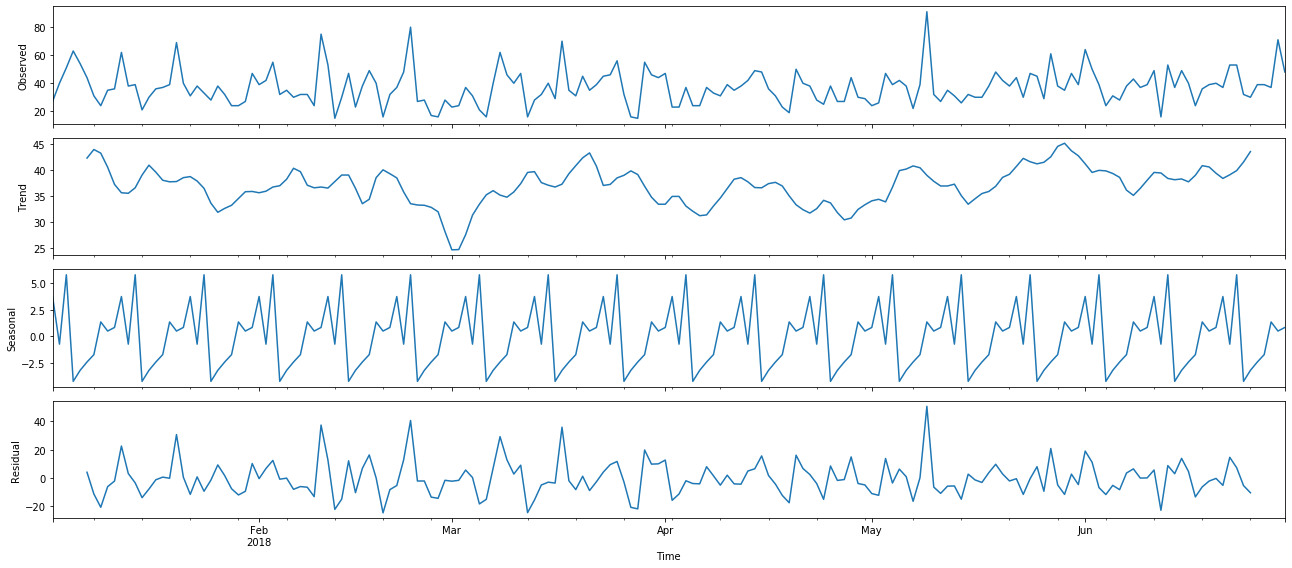

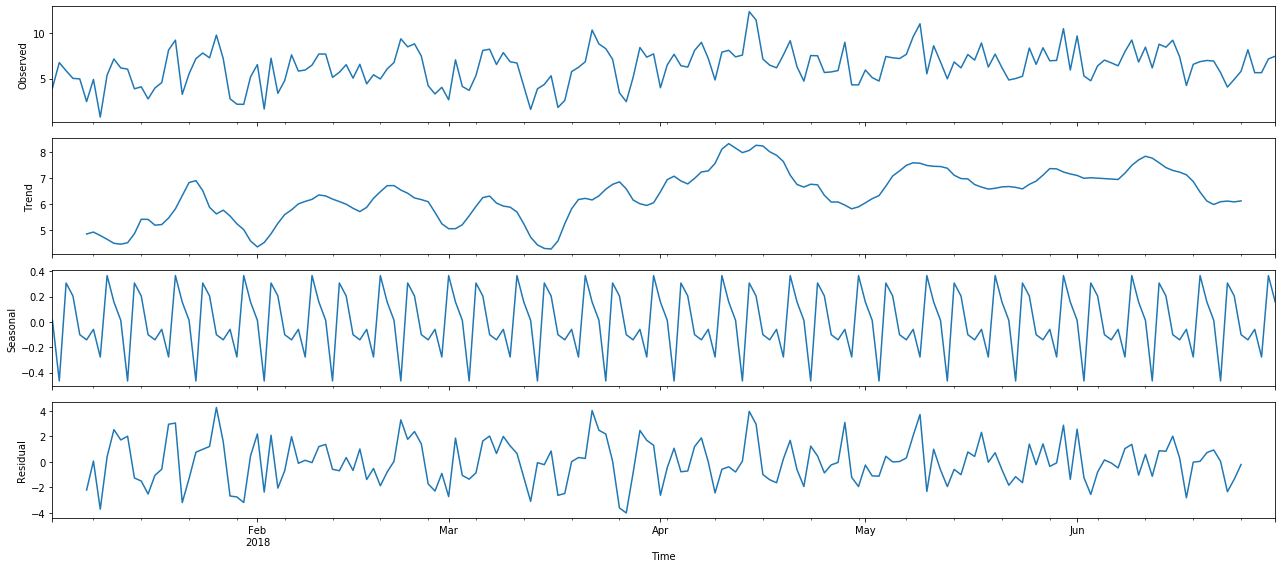

In [17]:
decomposition_dish1 = plot_seasonal_decomposition(dish1_daily,"Dish1",freq=10)
decomposition_dish2 = plot_seasonal_decomposition(dish2_daily,"Dish2",freq=10)

# Both dishes orders have seosonality. It might seem that for dish1 the residuals variance is high, but the observed data is also high. when checking auto correlation for white noise we will see that there is no correlation between residuals.

In [18]:
lags = [1,5,10,20,40,80,100]

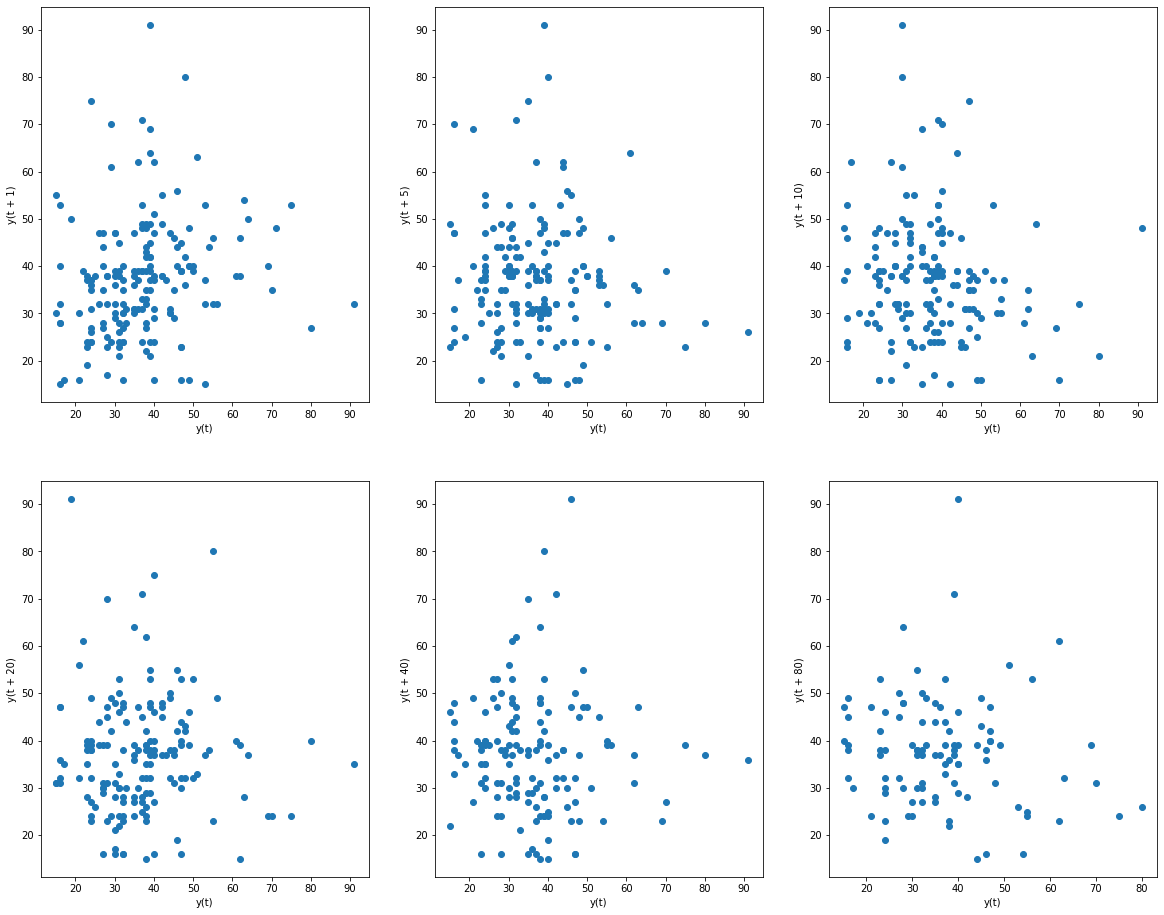

In [19]:
lags_plot(dish1_daily,lags)

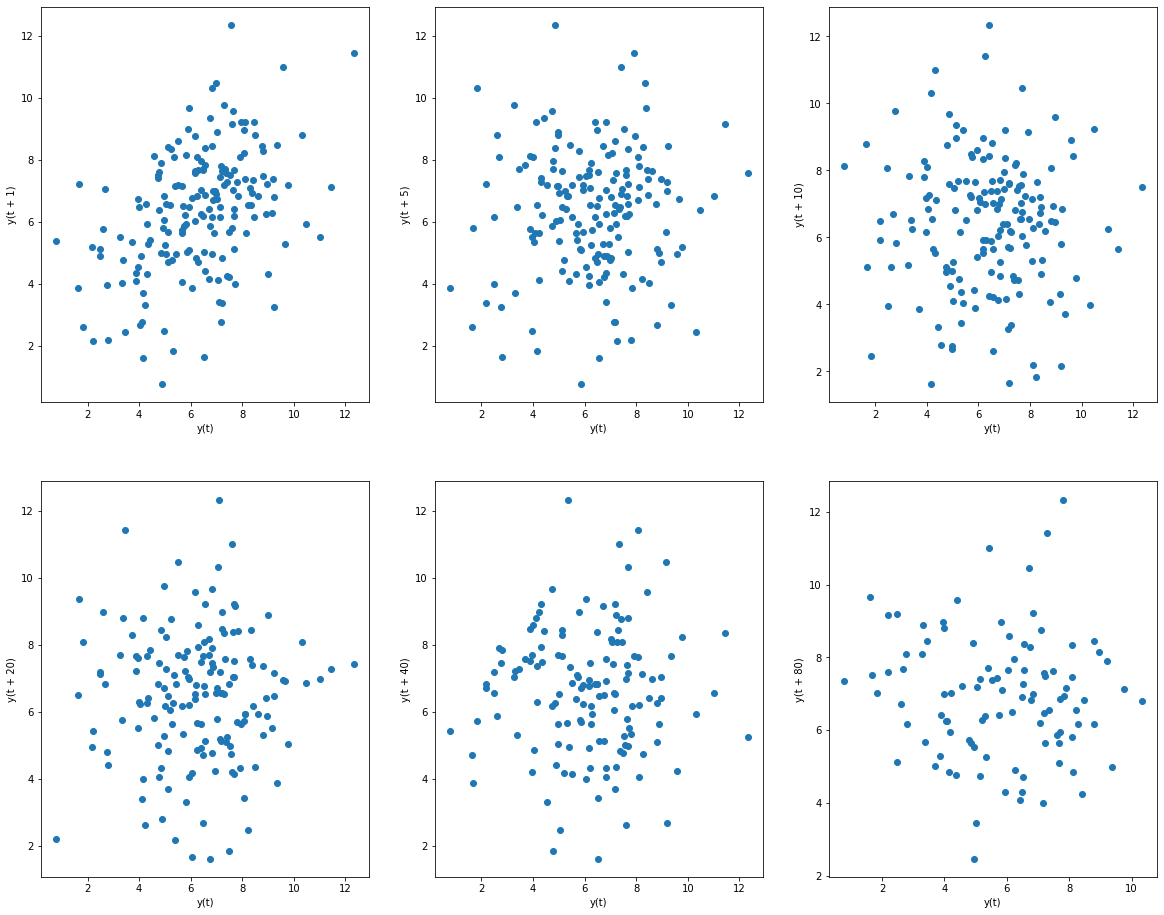

In [20]:
lags_plot(dish2_daily,lags)

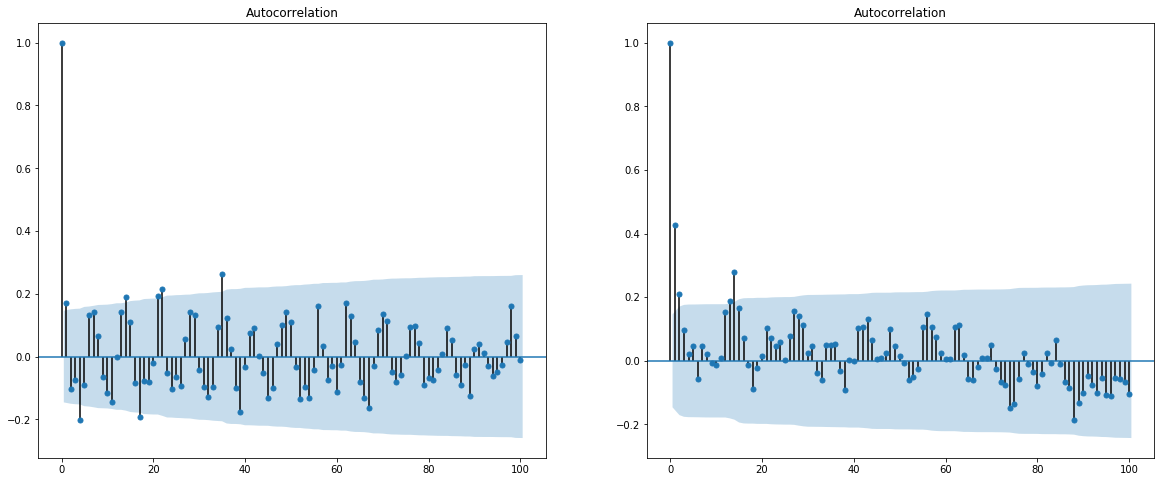

In [21]:
fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(20, 8))
plot_acf(dish1_daily["Dish1"],lags=100,ax=axes[0])
plot_acf(dish2_daily["Dish2"],lags=100,ax=axes[1])
plt.show()

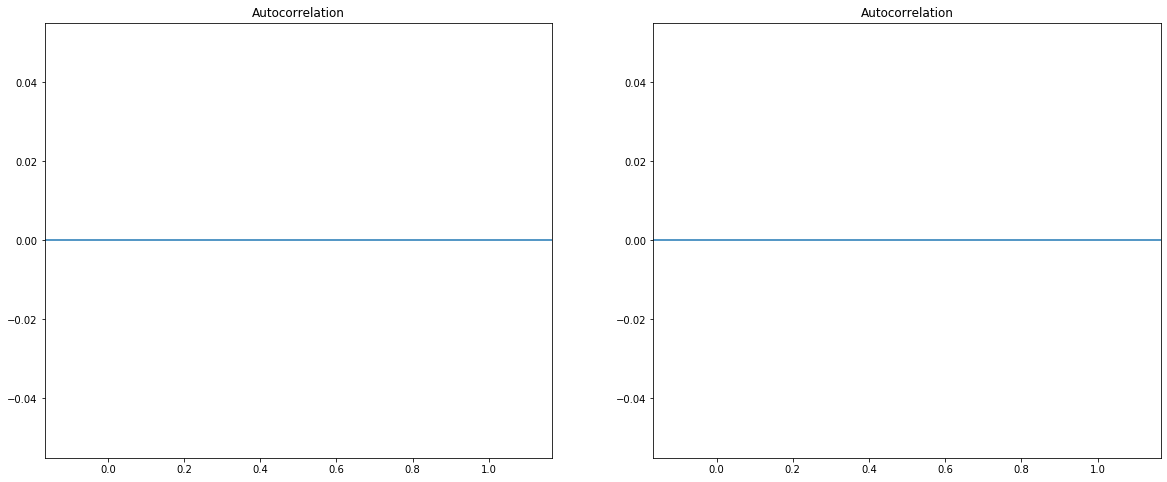

In [22]:
fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(20, 8))
plot_acf(decomposition_dish1.resid,ax=axes[0])
plot_acf(decomposition_dish2.resid,ax=axes[1])
plt.show()

# Modeling with Simple Methods

In [23]:
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

In [24]:
dish1_train = dish1_daily[0:140]
dish1_test = dish1_daily[140:]
dish2_train = dish2_daily[0:140]
dish2_test = dish2_daily[140:]


# Simple Exponential Smoothing

--MSE of Dish1 with smoothing level 0.5 -- 119.10992267688798
--MSE of Dish1 with smoothing level 0.99 -- 125.47840298159512
--R2 of Dish1 with smoothing level 0.5 -- -0.008231278610838944
--R2 of Dish1 with smoothing level 0.99 -- -0.06213863490928051
---------------------------------------------------------------
--MSE of Dish2 with smoothing level 0.5 -- 2.2936428028976863
--MSE of Dish2 with smoothing level 0.99 -- 2.690289475967817
--R2 of Dish2 with smoothing level 0.5 -- -0.0008639415784619242
--R2 of Dish2 with smoothing level 0.99 -- -0.17394640765444191


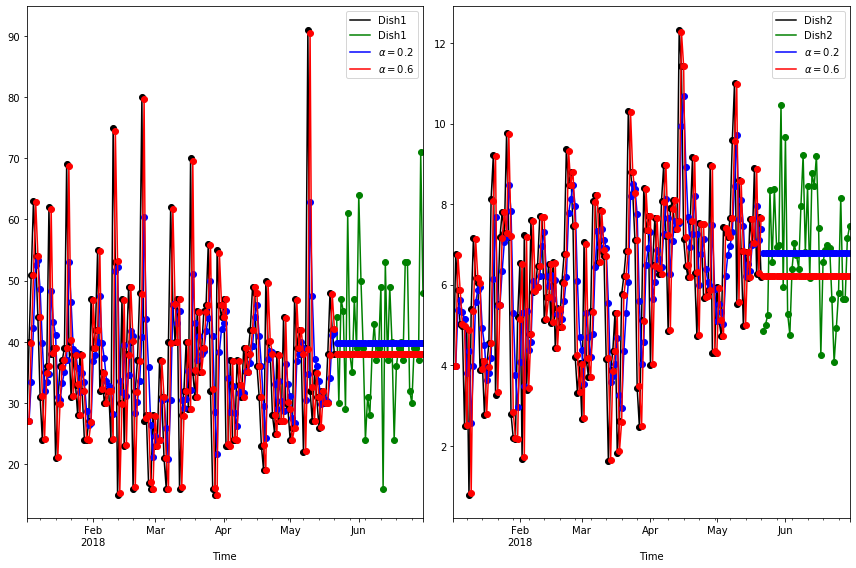

In [43]:
fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(20, 8))

fit1_dish1 = SimpleExpSmoothing(dish1_train).fit(smoothing_level=0.5,optimized=False)
fcast1_dish1 = fit1_dish1.forecast(40).rename(r'$\alpha=0.2$')
fit2_dish1 = SimpleExpSmoothing(dish1_train).fit(smoothing_level=0.99,optimized=False)
fcast2_dish1 = fit2_dish1.forecast(40).rename(r'$\alpha=0.6$')
ax = dish1_train.plot(marker='o', color='black', figsize=(12,8),ax=axes[0])
dish1_test.plot(marker='o',ax=ax, color='green')
fcast1_dish1.plot(marker='o', ax=ax, color='blue', legend=True)
fit1_dish1.fittedvalues.plot(marker='o', ax=ax, color='blue')
fcast2_dish1.plot(marker='o', ax=ax, color='red', legend=True)
fit2_dish1.fittedvalues.plot(marker='o', ax=ax, color='red')

fit1_dish2 = SimpleExpSmoothing(dish2_train).fit(smoothing_level=0.5,optimized=False)
fcast1_dish2 = fit1_dish2.forecast(40).rename(r'$\alpha=0.2$')
fit2_dish2 = SimpleExpSmoothing(dish2_train).fit(smoothing_level=0.99,optimized=False)
fcast2_dish2 = fit2_dish2.forecast(40).rename(r'$\alpha=0.6$')
ax = dish2_train.plot(marker='o', color='black', figsize=(12,8),ax=axes[1])
dish2_test.plot(marker='o',ax=ax, color='green')
fcast1_dish2.plot(marker='o', ax=ax, color='blue', legend=True)
fit1_dish2.fittedvalues.plot(marker='o', ax=ax, color='blue')
fcast2_dish2.plot(marker='o', ax=ax, color='red', legend=True)
fit2_dish2.fittedvalues.plot(marker='o', ax=ax, color='red')

fig.tight_layout()

print('--MSE of {0} with smoothing level {1} -- {2}'.format('Dish1',0.5,mean_squared_error(dish1_test,fit1_dish1.predict(start=dish1_test.index[0], end=dish1_test.index[-1]))))
print('--MSE of {0} with smoothing level {1} -- {2}'.format('Dish1',0.99,mean_squared_error(dish1_test,fit2_dish1.predict(start=dish1_test.index[0], end=dish1_test.index[-1]))))
print('--R2 of {0} with smoothing level {1} -- {2}'.format('Dish1',0.5,r2_score(dish1_test,fit1_dish1.predict(start=dish1_test.index[0], end=dish1_test.index[-1]))))
print('--R2 of {0} with smoothing level {1} -- {2}'.format('Dish1',0.99,r2_score(dish1_test,fit2_dish1.predict(start=dish1_test.index[0], end=dish1_test.index[-1]))))
print('---------------------------------------------------------------')
print('--MSE of {0} with smoothing level {1} -- {2}'.format('Dish2',0.5,mean_squared_error(dish2_test,fit1_dish2.predict(start=dish2_test.index[0], end=dish2_test.index[-1]))))
print('--MSE of {0} with smoothing level {1} -- {2}'.format('Dish2',0.99,mean_squared_error(dish2_test,fit2_dish2.predict(start=dish2_test.index[0], end=dish2_test.index[-1]))))
print('--R2 of {0} with smoothing level {1} -- {2}'.format('Dish2',0.5,r2_score(dish2_test,fit1_dish2.predict(start=dish2_test.index[0], end=dish2_test.index[-1]))))
print('--R2 of {0} with smoothing level {1} -- {2}'.format('Dish2',0.99,r2_score(dish2_test,fit2_dish2.predict(start=dish2_test.index[0], end=dish2_test.index[-1]))))

# As it was expected for simple exponential smoothing, for higher alfas overfitting is very big and the rest data forecast for example for 30 further steps stays the same. For dish1 it is about 50 for dish2 is about 7.

# Holt's Method

/home/levon/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/holtwinters.py:712: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)


--MSE of Dish1 with smoothing level 0.9 and smoothing slope 0.1 -- 123.18121655420062
--MSE of Dish1 with smoothing level 0.3 and smoothing slope 0.1 -- 270.40618900141317
--MSE of Dish1 with damped -- 136.92072016266758
--R2 of Dish1 with smoothing level 0.9 and smoothing slope 0.1 -- -0.04269361171686059
--R2 of Dish1 with smoothing level 0.3 and smoothing slope 0.1 -- -1.288910709989742
--R2 of Dish1 with damped -- -0.15899456279900592
-----------------------------------------------------------------------
--MSE of Dish2 with smoothing level 0.9 and smoothing slope 0.1 -- 7.632051651987974
--MSE of Dish2 with smoothing level 0.3 and smoothing slope 0.1 -- 2.457366467098557
--MSE of Dish2 with damped -- 2.328489273131917
--R2 of Dish2 with smoothing level 0.9 and smoothing slope 0.1 -- -2.3303552275396897
--R2 of Dish2 with smoothing level 0.3 and smoothing slope 0.1 -- -0.07230711122751621
--R2 of Dish2 with damped -- -0.016069698771633778


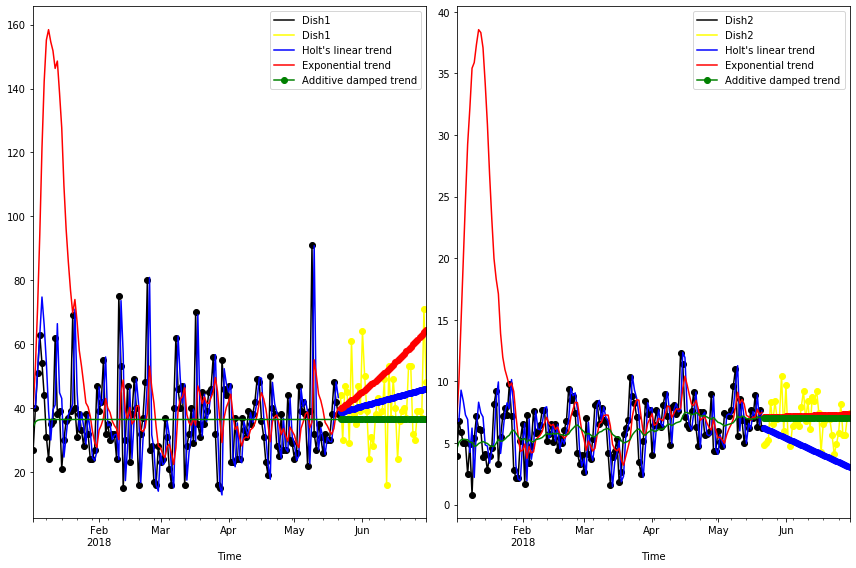

In [52]:
fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(40, 8))

fit1_dish1 = Holt(dish1_train).fit(smoothing_level=0.9, smoothing_slope=0.1, optimized=False)
fcast1_dish1 = fit1_dish1.forecast(40).rename("Holt's linear trend")
fit2_dish1 = Holt(dish1_train, exponential=True).fit(smoothing_level=0.3, smoothing_slope=0.1, optimized=False)
fcast2_dish1 = fit2_dish1.forecast(40).rename("Exponential trend")
fit3_dish1 = Holt(dish1_train, damped=True).fit()
fcast3_dish1 = fit3_dish1.forecast(40).rename("Additive damped trend")
ax = dish1_train.plot(color="black", marker="o", figsize=(12,8),ax=axes[0])
dish1_test.plot(color="yellow", marker="o",ax=ax)
fit1_dish1.fittedvalues.plot(ax=ax, color='blue')
fcast1_dish1.plot(ax=ax, color='blue', marker="o", legend=True)
fit2_dish1.fittedvalues.plot(ax=ax, color='red')
fcast2_dish1.plot(ax=ax, color='red', marker="o", legend=True)
fit3_dish1.fittedvalues.plot(ax=ax, color='green')
fcast3_dish1.plot(ax=ax, color='green', marker="o", legend=True)


fit1_dish2 = Holt(dish2_train).fit(smoothing_level=0.9, smoothing_slope=0.1, optimized=False)
fcast1_dish2 = fit1_dish2.forecast(40).rename("Holt's linear trend")
fit2_dish2 = Holt(dish2_train, exponential=True).fit(smoothing_level=0.3, smoothing_slope=0.1, optimized=False)
fcast2_dish2 = fit2_dish2.forecast(40).rename("Exponential trend")
fit3_dish2 = Holt(dish2_train, damped=True).fit()
fcast3_dish2 = fit3_dish2.forecast(40).rename("Additive damped trend")
ax = dish2_train.plot(color="black", marker="o", figsize=(12,8),ax=axes[1])
dish2_test.plot(color="yellow", marker="o",ax=ax)
fit1_dish2.fittedvalues.plot(ax=ax, color='blue')
fcast1_dish2.plot(ax=ax, color='blue', marker="o", legend=True)
fit2_dish2.fittedvalues.plot(ax=ax, color='red')
fcast2_dish2.plot(ax=ax, color='red', marker="o", legend=True)
fit3_dish2.fittedvalues.plot(ax=ax, color='green')
fcast3_dish2.plot(ax=ax, color='green', marker="o", legend=True)

fig.tight_layout()
print('--MSE of {0} with smoothing level {1} and smoothing slope {3} -- {2}'.format('Dish1',0.9,mean_squared_error(dish1_test,fit1_dish1.predict(start=dish1_test.index[0], end=dish1_test.index[-1])),0.1))
print('--MSE of {0} with smoothing level {1} and smoothing slope {3} -- {2}'.format('Dish1',0.3,mean_squared_error(dish1_test,fit2_dish1.predict(start=dish1_test.index[0], end=dish1_test.index[-1])),0.1))
print('--MSE of {0} with damped -- {1}'.format('Dish1',mean_squared_error(dish1_test,fit3_dish1.predict(start=dish1_test.index[0], end=dish1_test.index[-1]))))
print('--R2 of {0} with smoothing level {1} and smoothing slope {3} -- {2}'.format('Dish1',0.9,r2_score(dish1_test,fit1_dish1.predict(start=dish1_test.index[0], end=dish1_test.index[-1])),0.1))
print('--R2 of {0} with smoothing level {1} and smoothing slope {3} -- {2}'.format('Dish1',0.3,r2_score(dish1_test,fit2_dish1.predict(start=dish1_test.index[0], end=dish1_test.index[-1])),0.1))
print('--R2 of {0} with damped -- {1}'.format('Dish1',r2_score(dish1_test,fit3_dish1.predict(start=dish1_test.index[0], end=dish1_test.index[-1]))))
print('-----------------------------------------------------------------------')
print('--MSE of {0} with smoothing level {1} and smoothing slope {3} -- {2}'.format('Dish2',0.9,mean_squared_error(dish2_test,fit1_dish2.predict(start=dish2_test.index[0], end=dish2_test.index[-1])),0.1))
print('--MSE of {0} with smoothing level {1} and smoothing slope {3} -- {2}'.format('Dish2',0.3,mean_squared_error(dish2_test,fit2_dish2.predict(start=dish2_test.index[0], end=dish2_test.index[-1])),0.1))
print('--MSE of {0} with damped -- {1}'.format('Dish2',mean_squared_error(dish2_test,fit3_dish2.predict(start=dish2_test.index[0], end=dish2_test.index[-1]))))
print('--R2 of {0} with smoothing level {1} and smoothing slope {3} -- {2}'.format('Dish2',0.9,r2_score(dish2_test,fit1_dish2.predict(start=dish2_test.index[0], end=dish2_test.index[-1])),0.1))
print('--R2 of {0} with smoothing level {1} and smoothing slope {3} -- {2}'.format('Dish2',0.3,r2_score(dish2_test,fit2_dish2.predict(start=dish2_test.index[0], end=dish2_test.index[-1])),0.1))
print('--R2 of {0} with damped -- {1}'.format('Dish2',r2_score(dish2_test,fit3_dish2.predict(start=dish2_test.index[0], end=dish2_test.index[-1]))))

# Linear method works bettern then exponential method.We see that for both dishes dumped method works better for further predictions. 

/home/levon/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/holtwinters.py:712: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)


--MSE of Dish1 with seasonal period 4 , with trend type add and seaosanlity type add -- 119.55731734961064
--MSE of Dish1 with seasonal period 4 , with trend type add and seaosanlity type mull -- 119.55994159629181
--MSE of Dish1 with seasonal period 4 , with trend type add and seaosanlity type add -- 144.39859750249715
--MSE of Dish1 with seasonal period 4 , with trend type add and seaosanlity type mul -- 142.4884461475986
--R2 of Dish1 with seasonal period 4 , with trend type add and seaosanlity type add -- -0.012018345991837043
--R2 of Dish1 with seasonal period 4 , with trend type add and seaosanlity type mul -- -0.012040559486122593
--R2 of Dish1 with seasonal period 4 , with trend type add and seaosanlity type add -- -0.22229264630195456
--R2 of Dish1 with seasonal period 4 , with trend type add and seaosanlity type mul -- -0.20612376381418773
-----------------------------------------------------------------------
--MSE of Dish2 with seasonal period 4 , with trend type add and se

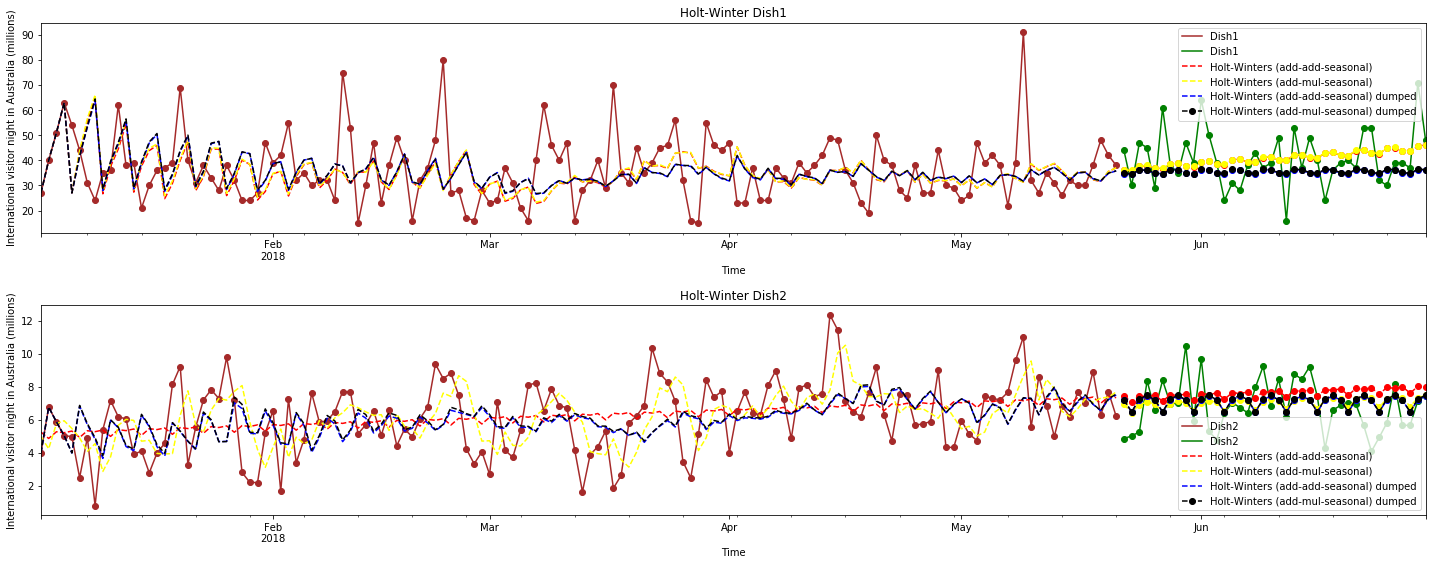

In [57]:
fig, axes = plt.subplots(nrows=2, ncols=1,figsize=(20, 8))

fit1_dish1 = ExponentialSmoothing(dish1_train, seasonal_periods=4, trend='add', seasonal='add').fit(use_boxcox=True)
fit2_dish1 = ExponentialSmoothing(dish1_train, seasonal_periods=4, trend='add', seasonal='mul').fit(use_boxcox=True)
fit3_dish1 = ExponentialSmoothing(dish1_train, seasonal_periods=4, trend='add', seasonal='add', damped=True).fit(use_boxcox=True)
fit4_dish1 = ExponentialSmoothing(dish1_train, seasonal_periods=4, trend='add', seasonal='mul', damped=True).fit(use_boxcox=True)
ax = dish1_train.plot(figsize=(20,8), marker='o', color='brown', title="Holt-Winter Dish1" ,ax=axes[0])
dish1_test.plot( marker='o', color='green' ,ax=ax)
ax.set_ylabel("International visitor night in Australia (millions)")
ax.set_xlabel("Year")
fit1_dish1.fittedvalues.plot(ax=ax, style='--', color='red')
fit2_dish1.fittedvalues.plot(ax=ax, style='--', color='yellow')
fit3_dish1.fittedvalues.plot(ax=ax, style='--', color='blue')
fit4_dish1.fittedvalues.plot(ax=ax, style='--', color='black')
fit1_dish1.forecast(40).rename('Holt-Winters (add-add-seasonal)').plot(ax=ax, style='--', marker='o', color='red', legend=True)
fit2_dish1.forecast(40).rename('Holt-Winters (add-mul-seasonal)').plot(ax=ax, style='--', marker='o', color='yellow', legend=True)
fit3_dish1.forecast(40).rename('Holt-Winters (add-add-seasonal) dumped').plot(ax=ax, style='--', marker='o', color='blue', legend=True)
fit4_dish1.forecast(40).rename('Holt-Winters (add-mul-seasonal) dumped').plot(ax=ax, style='--', marker='o', color='black', legend=True)


fit1_dish2 = ExponentialSmoothing(dish2_train, seasonal_periods=4, trend='add', seasonal='add').fit(use_boxcox=True)
fit2_dish2 = ExponentialSmoothing(dish2_train, seasonal_periods=4, trend='add', seasonal='mul').fit(use_boxcox=True)
fit3_dish2 = ExponentialSmoothing(dish2_train, seasonal_periods=4, trend='add', seasonal='add', damped=True).fit(use_boxcox=True)
fit4_dish2 = ExponentialSmoothing(dish2_train, seasonal_periods=4, trend='add', seasonal='mul', damped=True).fit(use_boxcox=True)
ax = dish2_train.plot(figsize=(20,8), marker='o', color='brown', title="Holt-Winter Dish2" ,ax=axes[1])
dish2_test.plot(marker='o', color='green' ,ax=ax)
ax.set_ylabel("International visitor night in Australia (millions)")
ax.set_xlabel("Year")
fit1_dish2.fittedvalues.plot(ax=ax, style='--', color='red')
fit2_dish2.fittedvalues.plot(ax=ax, style='--', color='yellow')
fit3_dish2.fittedvalues.plot(ax=ax, style='--', color='blue')
fit4_dish2.fittedvalues.plot(ax=ax, style='--', color='black')
fit1_dish2.forecast(40).rename('Holt-Winters (add-add-seasonal)').plot(ax=ax, style='--', marker='o', color='red', legend=True)
fit2_dish2.forecast(40).rename('Holt-Winters (add-mul-seasonal)').plot(ax=ax, style='--', marker='o', color='yellow', legend=True)
fit3_dish2.forecast(40).rename('Holt-Winters (add-add-seasonal) dumped').plot(ax=ax, style='--', marker='o', color='blue', legend=True)
fit4_dish2.forecast(40).rename('Holt-Winters (add-mul-seasonal) dumped').plot(ax=ax, style='--', marker='o', color='black', legend=True)



fig.tight_layout()
print('--MSE of {0} with seasonal period {1} , with trend type {3} and seaosanlity type {4} -- {2}'.format('Dish1',4,mean_squared_error(dish1_test,fit1_dish1.predict(start=dish1_test.index[0], end=dish1_test.index[-1])),'add','add'))
print('--MSE of {0} with seasonal period {1} , with trend type {3} and seaosanlity type {4} -- {2}'.format('Dish1',4,mean_squared_error(dish1_test,fit2_dish1.predict(start=dish1_test.index[0], end=dish1_test.index[-1])),'add','mull'))
print('--MSE of {0} with seasonal period {1} , with trend type {3} and seaosanlity type {4} -- {2}'.format('Dish1',4,mean_squared_error(dish1_test,fit3_dish1.predict(start=dish1_test.index[0], end=dish1_test.index[-1])),'add','add'))
print('--MSE of {0} with seasonal period {1} , with trend type {3} and seaosanlity type {4} -- {2}'.format('Dish1',4,mean_squared_error(dish1_test,fit4_dish1.predict(start=dish1_test.index[0], end=dish1_test.index[-1])),'add','mul'))

print('--R2 of {0} with seasonal period {1} , with trend type {3} and seaosanlity type {4} -- {2}'.format('Dish1',4,r2_score(dish1_test,fit1_dish1.predict(start=dish1_test.index[0], end=dish1_test.index[-1])),'add','add'))
print('--R2 of {0} with seasonal period {1} , with trend type {3} and seaosanlity type {4} -- {2}'.format('Dish1',4,r2_score(dish1_test,fit2_dish1.predict(start=dish1_test.index[0], end=dish1_test.index[-1])),'add','mul'))
print('--R2 of {0} with seasonal period {1} , with trend type {3} and seaosanlity type {4} -- {2}'.format('Dish1',4,r2_score(dish1_test,fit3_dish1.predict(start=dish1_test.index[0], end=dish1_test.index[-1])),'add','add'))
print('--R2 of {0} with seasonal period {1} , with trend type {3} and seaosanlity type {4} -- {2}'.format('Dish1',4,r2_score(dish1_test,fit4_dish1.predict(start=dish1_test.index[0], end=dish1_test.index[-1])),'add','mul'))

print('-----------------------------------------------------------------------')

print('--MSE of {0} with seasonal period {1} , with trend type {3} and seaosanlity type {4} -- {2}'.format('Dish2',4,mean_squared_error(dish2_test,fit1_dish2.predict(start=dish2_test.index[0], end=dish2_test.index[-1])),'add','add'))
print('--MSE of {0} with seasonal period {1} , with trend type {3} and seaosanlity type {4} -- {2}'.format('Dish2',4,mean_squared_error(dish2_test,fit2_dish2.predict(start=dish2_test.index[0], end=dish2_test.index[-1])),'add','mul'))
print('--MSE of {0} with seasonal period {1} , with trend type {3} and seaosanlity type {4} -- {2}'.format('Dish2',4,mean_squared_error(dish2_test,fit3_dish2.predict(start=dish2_test.index[0], end=dish2_test.index[-1])),'add','add'))
print('--MSE of {0} with seasonal period {1} , with trend type {3} and seaosanlity type {4} -- {2}'.format('Dish2',4,mean_squared_error(dish2_test,fit4_dish2.predict(start=dish2_test.index[0], end=dish2_test.index[-1])),'add','mul'))

print('--R2 of {0} with seasonal period {1} , with trend type {3} and seaosanlity type {4} -- {2}'.format('Dish2',4,r2_score(dish2_test,fit1_dish2.predict(start=dish2_test.index[0], end=dish2_test.index[-1])),'add','add'))
print('--R2 of {0} with seasonal period {1} , with trend type {3} and seaosanlity type {4} -- {2}'.format('Dish2',4,r2_score(dish2_test,fit2_dish2.predict(start=dish2_test.index[0], end=dish2_test.index[-1])),'add','mul'))
print('--R2 of {0} with seasonal period {1} , with trend type {3} and seaosanlity type {4} -- {2}'.format('Dish2',4,r2_score(dish2_test,fit3_dish2.predict(start=dish2_test.index[0], end=dish2_test.index[-1])),'add','add'))
print('--R2 of {0} with seasonal period {1} , with trend type {3} and seaosanlity type {4} -- {2}'.format('Dish2',4,r2_score(dish2_test,fit4_dish2.predict(start=dish2_test.index[0], end=dish2_test.index[-1])),'add','mul'))

# The best mse and r2 is for trend additive and seasonal additive model.

# ARIMA Method

In [72]:
import statsmodels.api as sm
import itertools
from statsmodels.tsa.arima_model import ARIMA

In [130]:
def param_finding(train,test):
    params_range_dict ={"p":list(np.arange(0,2)),
                        "d":list(np.arange(0,2)),
                        "q":list(np.arange(0,2))
                       }
    params_range = list(params_range_dict.values())
    params = list(itertools.product(*params_range))
    aics, mses = [], []
    for param in params:
        try:
            fitted = ARIMA(endog=train,order=param).fit()
            pred = fitted.predict(start = test.index[0],end = test.index[-1])
            mses.append(mean_squared_error(pred,test))
            aics.append(fitted.aic)
        except:
            continue
    return mses,aics,params


In [131]:
mses,aics,params = param_finding(dish1_train,dish1_test)
best_param = params[np.argmin(mses)]
mse = mses[np.argmin(mses)]
aic = aics[np.argmin(aics)]

In [132]:
model_dish1 = ARIMA(endog=dish1_train,order=best_param).fit()
pred_dish1 = model_dish1.predict(start = dish1_test.index[0], end = dish1_test.index[-1])

In [133]:
mses,aics,params = param_finding(dish2_train,dish2_test)
best_param = params[np.argmin(mses)]
mse = mses[np.argmin(mses)]
aic = aics[np.argmin(aics)]

In [134]:
model_dish2 = ARIMA(endog=dish2_train,order=best_param).fit()
pred_dish2 = model_dish2.predict(start = dish2_test.index[0], end = dish2_test.index[-1])

R2 value for Dish1 with Arima -0.16143799144295712
MSE value for Dish1 with Arima 137.20938071409233
R2 value for Dish2 with Arima -0.19500641553940645
MSE value for Dish2 with Arima 2.7385519155538978


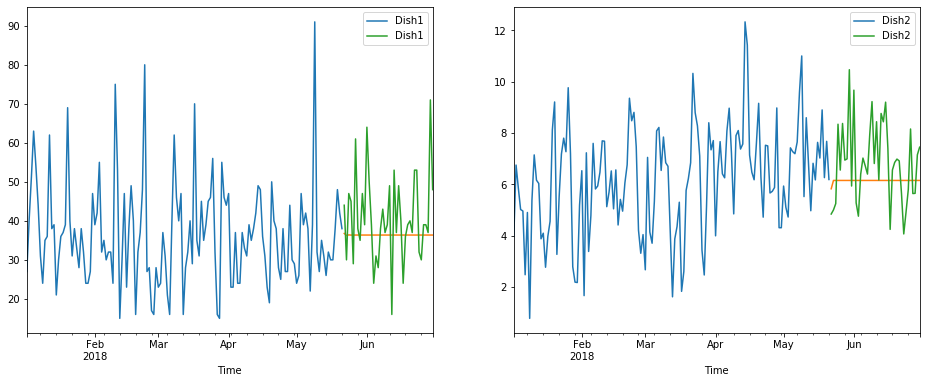

In [137]:

fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(16, 6))
ax = dish1_train.plot(label="Dish1 Train",ax=axes[0])
pred_dish1.plot(label='Dish1 Prediction',ax=ax)                                                 
dish1_test.plot(label="Dish1 Test",ax=ax)

ax = dish2_train.plot(label="Dish2 Train",ax=axes[1])
pred_dish2.plot(label='Dish2 Prediction',ax=ax)                                                 
dish2_test.plot(label="Dish2 Test",ax=ax)

print("R2 value for Dish1 with Arima",r2_score(dish1_test,pred_dish1))
print("MSE value for Dish1 with Arima",mean_squared_error(dish1_test,pred_dish1))
print("R2 value for Dish2 with Arima",r2_score(dish2_test,pred_dish2))
print("MSE value for Dish2 with Arima",mean_squared_error(dish2_test,pred_dish2))

# SARIMAX Method

In [166]:
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

In [173]:
def sarimax_best(train):
    results = []
    for param in pdq:
        for param_seasonal in seasonal_pdq:
            try:
                mod = sm.tsa.statespace.SARIMAX(train,order=param,seasonal_order=param_seasonal,)
                fitted = mod.fit()
                results.append([fitted.aic,param,param_seasonal])
            except:
                continue
    return results

In [174]:
results = sarimax_best(dish1_train)
best_param,best_seasonal_param = results[np.argmin([res[0] for res in results])][1:]

In [175]:
mod = sm.tsa.statespace.SARIMAX(dish1_train,order=best_param,seasonal_order=best_seasonal_param)
fitted = mod.fit()
pred_dish1 = fitted.predict(start = dish1_test.index[0], end = dish1_test.index[-1])

In [176]:
results = sarimax_best(dish2_train)
best_param,best_seasonal_param = results[np.argmin([res[0] for res in results])][1:]

In [177]:
mod = sm.tsa.statespace.SARIMAX(dish2_train,order=best_param,seasonal_order=best_seasonal_param)
fitted = mod.fit()
pred_dish2 = fitted.predict(start = dish2_test.index[0], end = dish2_test.index[-1])

R2 value for Dish1 with Arima -0.2036088997988963
MSE value for Dish1 with Arima 142.1913463999921
R2 value for Dish2 with Arima -0.03673223456508845
MSE value for Dish2 with Arima 2.3758408406562004


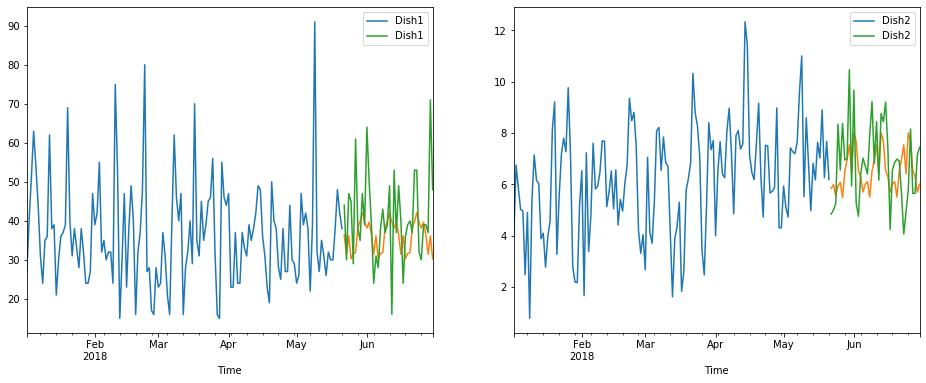

In [178]:
fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(16, 6))
ax = dish1_train.plot(label="Dish1 Train",ax=axes[0])
pred_dish1.plot(label='Dish1 Prediction',ax=ax)                                                 
dish1_test.plot(label="Dish1 Test",ax=ax)

ax = dish2_train.plot(label="Dish2 Train",ax=axes[1])
pred_dish2.plot(label='Dish2 Prediction',ax=ax)                                                 
dish2_test.plot(label="Dish2 Test",ax=ax)

print("R2 value for Dish1 with Arima",r2_score(dish1_test,pred_dish1))
print("MSE value for Dish1 with Arima",mean_squared_error(dish1_test,pred_dish1))
print("R2 value for Dish2 with Arima",r2_score(dish2_test,pred_dish2))
print("MSE value for Dish2 with Arima",mean_squared_error(dish2_test,pred_dish2))

# Even after implementing ARIMA and SARIMAX Simple Exponential Method for our small data worked better